# Drop empty siblings

Demonstration of implementation of [hipscat issue 302](https://github.com/astronomy-commons/hipscat/issues/302) "Optimize histogram binning to not produce large empty tiles"

The optimization here is to not collapse partitions into smaller order (larger area) if 3 of the 4 constituent pixels are empty. This doesn't cause any loss of data points, but the resulting catalog's partition info is more consistent with the actual distribution of data points.

Author: Melissa

In [1]:
import lsdb
import hipscat
from hipscat.inspection import plot_pixels, plot_pixel_list
from hipscat.pixel_math import generate_alignment
from hipscat.pixel_math.healpix_pixel import HealpixPixel
import numpy as np
from hipscat.io import file_io, paths

## DES

This survey's footprint is pretty wonky, and our partitioning of it looks pretty silly as a consequence.

/home/delucchi/git/fsspec/hipscat/src/hipscat/io/file_io/file_io.py:390: UserWarning: point_map.fits file written in RING ordering, due to https://github.com/astronomy-commons/hipscat/issues/271. Converting to NESTED.
  warnings.warn(


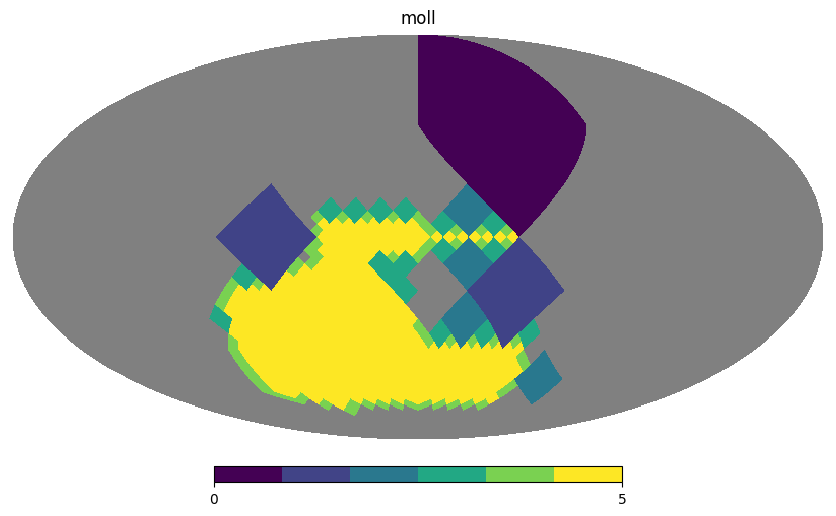

In [2]:
real_catalog = lsdb.read_hipscat('https://data.lsdb.io/unstable/des/des_dr2')
real_catalog.plot_pixels()

In [3]:

hist_file = "https://data.lsdb.io/unstable/des/des_dr2/point_map.fits"
hist = file_io.read_fits_image(hist_file)

/home/delucchi/git/fsspec/hipscat/src/hipscat/io/file_io/file_io.py:390: UserWarning: point_map.fits file written in RING ordering, due to https://github.com/astronomy-commons/hipscat/issues/271. Converting to NESTED.
  warnings.warn(


In [14]:
## Utility method we'll use a few times:

def plot_alignment(pixel_map):
    pixel_list = pixel_map[pixel_map != np.array(None)]
    pixel_list = np.unique(pixel_list)
    pixel_list = [HealpixPixel(hp_order, hp_pixel) for hp_order, hp_pixel, _ in pixel_list]
    plot_pixel_list(pixel_list)
    return pixel_list

In [4]:
unchanged = generate_alignment(
    hist, highest_order=7, threshold=1000000, drop_empty_siblings=False
)
original_pixels = plot_alignment(unchanged)

These should be EXACTLY the same pixels. Let's check.

In [6]:
difference_pixels = set(original_pixels) - set(real_catalog.get_healpix_pixels())
difference_pixels

set()

In [7]:
drop_siblings = generate_alignment(
    hist, highest_order=7, threshold=1000000, drop_empty_siblings=True
)
all_pixels = plot_alignment(drop_siblings)

Let's look a little closer at the pixels that are **DIFFERENT** between the two partitioning schemes.

In [10]:
difference_pixels = set(all_pixels) - set(original_pixels)
print(len(difference_pixels))
plot_pixel_list(list(difference_pixels))

39

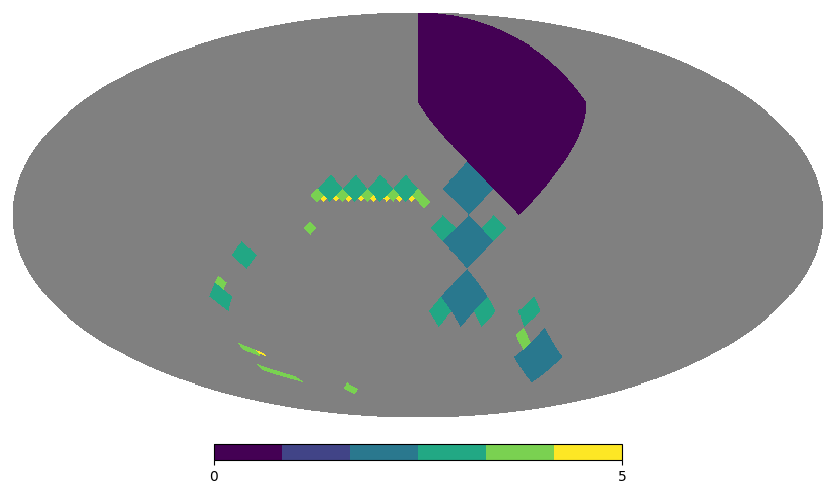

In [13]:
difference_pixels = set(original_pixels) - set(all_pixels)
plot_pixel_list(list(difference_pixels))

## ZTF

As a northern hemisphere survey, this has a southern border that often contains very large pixels (by area), as the population falls off at the edge.

/home/delucchi/git/fsspec/hipscat/src/hipscat/io/file_io/file_io.py:390: UserWarning: point_map.fits file written in RING ordering, due to https://github.com/astronomy-commons/hipscat/issues/271. Converting to NESTED.
  warnings.warn(
/home/delucchi/git/fsspec/hipscat/src/hipscat/io/file_io/file_io.py:390: UserWarning: point_map.fits file written in RING ordering, due to https://github.com/astronomy-commons/hipscat/issues/271. Converting to NESTED.
  warnings.warn(


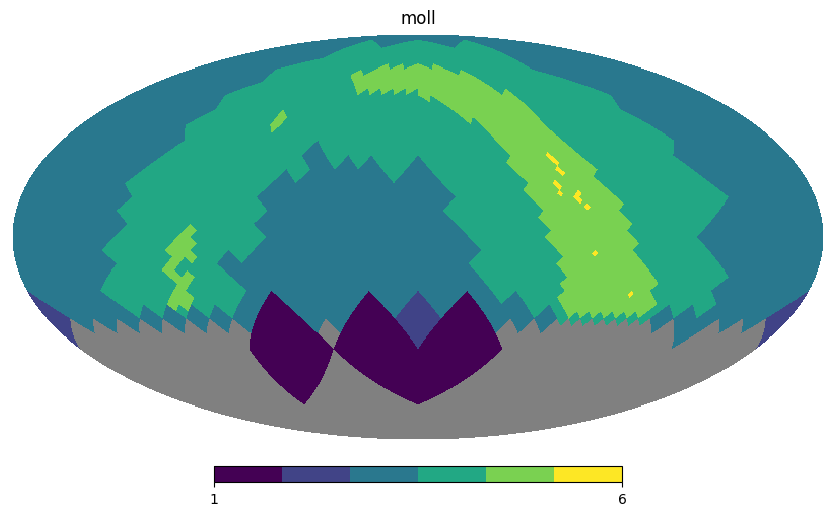

In [15]:
real_catalog = lsdb.read_hipscat('https://data.lsdb.io/unstable/ztf/ztf_dr14')
hist_file = "https://data.lsdb.io/unstable/ztf/ztf_dr14/point_map.fits"
hist = file_io.read_fits_image(hist_file)
real_catalog.plot_pixels()

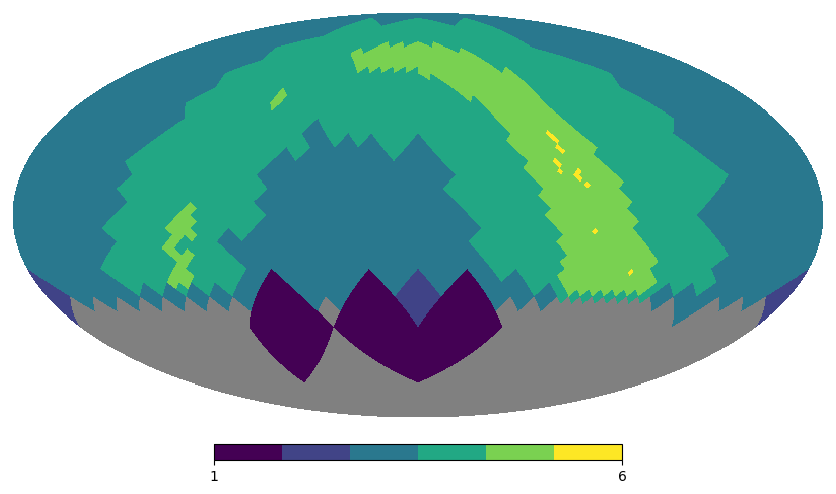

In [17]:
unchanged = generate_alignment(
    hist, highest_order=8, threshold=1000000, drop_empty_siblings=False
)
original_pixels = plot_alignment(unchanged)

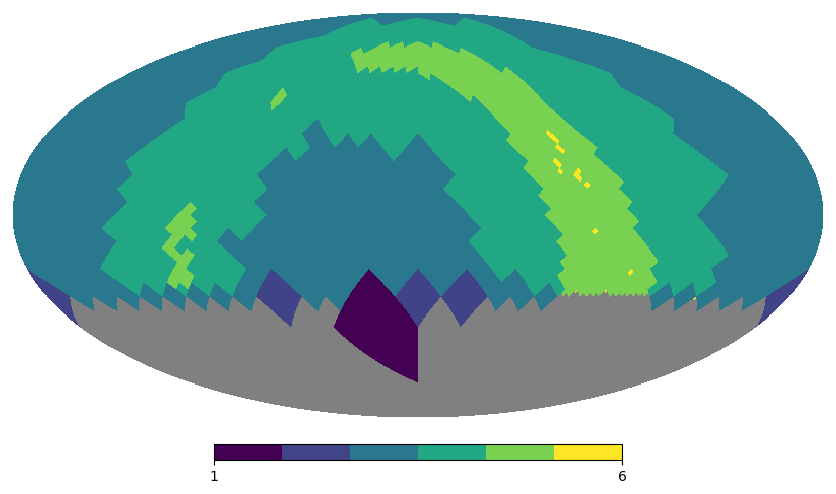

In [19]:
drop_siblings = generate_alignment(
    hist, highest_order=8, threshold=1000000, drop_empty_siblings=True
)
all_pixels = plot_alignment(drop_siblings)

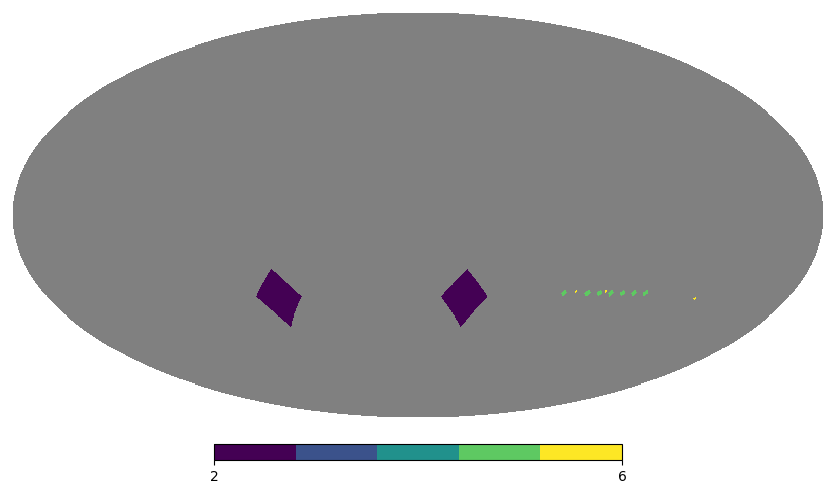

In [20]:
difference_pixels = set(all_pixels) - set(original_pixels)
len(difference_pixels)
plot_pixel_list(list(difference_pixels))

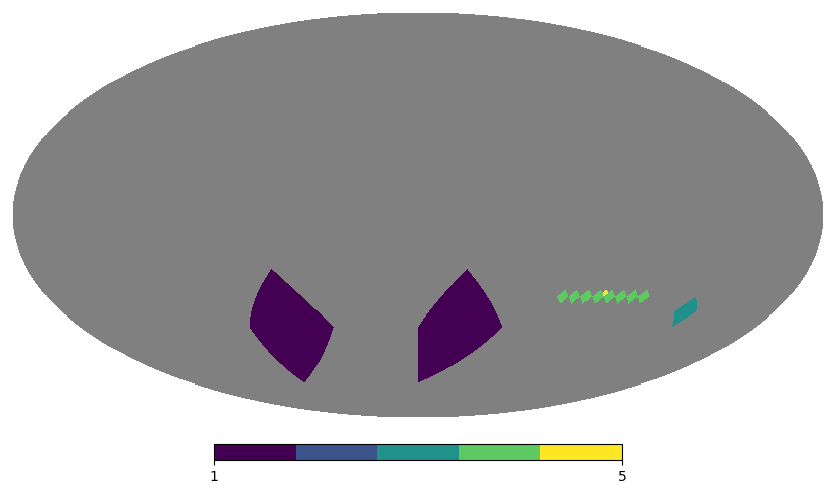

In [21]:
difference_pixels = set(original_pixels) - set(all_pixels)
plot_pixel_list(list(difference_pixels))